In [1]:
#3/7/24 Neural Net for model creation using Combined Mutagen Chemopy Data with K-Fold
#Suppress unneeded low level warning messages
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import math
import sys
sys.path.insert(1, '/Users/james/Documents/Honours/Python')
from Function_Repo import metriccalc
from Function_Repo import nnmetrics
import matplotlib.pyplot as plt

#Data import
#targetdata = pd.read_csv('/Users/james/Documents/Honours/Data/structdata/Mutagen/mutagenMorganfp.csv')
seed = 81
datasets = []
index = []
targetdata = pd.read_csv('/Users/james/Documents/Honours/Data/structdata/Mutagen/Padel/mutagen_padel.csv')
targetdata = targetdata.dropna(axis=0)

#Splitting data into 5 folds 
dfarray = targetdata.to_numpy()
#First set aside 20% of the data for a final validation at the end
dfarray, tempset = train_test_split(dfarray, test_size=0.2, random_state=seed, stratify = targetdata['Toxicity_Value'])

size = len(dfarray) / 5
splitsize = math.ceil(size)
empty = [[] for _ in range(5)]
splits = []
for list in empty:
    splits.append(list)

loops = 0
currsplit = 0
#Results in a list of 5 lists that each contain 1/5 of the targetdata
for row in dfarray:
    splits[currsplit].append(row)
    if loops == splitsize:
        loops = 0
        currsplit = currsplit + 1
    loops = loops + 1

folds = []
for split in splits:
    temp = pd.DataFrame(split)
    folds.append(temp)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


for fold 1 best mcc of 0.7103304726027667 with an mtry of 26 on test set


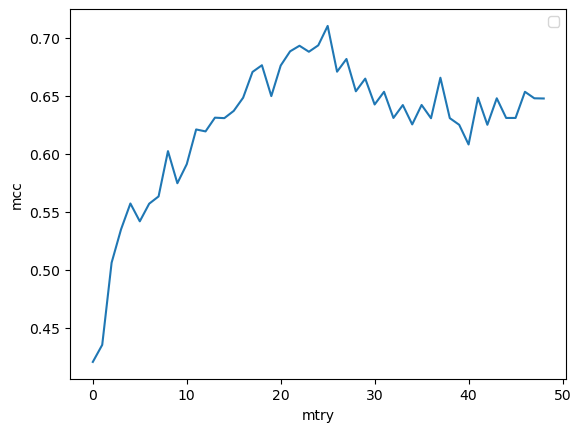

for model 1 validation metrics of:
positives in data 177
negatives in data 175 

fn count = 31
tn count = 138
tp count = 146
fp count = 37 

net accuracy = 0.8068181818181818
positive accuracy = 0.8248587570621468
negative accuracy = 0.7885714285714286 

fpr = 0.21142857142857144
tpr = 0.8248587570621468 

f1 score = 0.8111111111111111
mcc = 0.6139060357473188
cohen Kappa = 0.6135490329038716


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


for fold 2 best mcc of 0.5726623376623377 with an mtry of 40 on test set


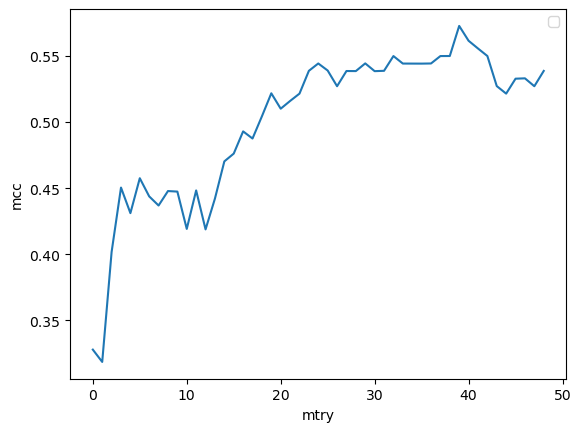

for model 2 validation metrics of:
positives in data 182
negatives in data 170 

fn count = 38
tn count = 140
tp count = 144
fp count = 30 

net accuracy = 0.8068181818181818
positive accuracy = 0.7912087912087912
negative accuracy = 0.8235294117647058 

fpr = 0.17647058823529413
tpr = 0.7912087912087912 

f1 score = 0.8089887640449438
mcc = 0.614420549830999
cohen Kappa = 0.6137859816703239


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


for fold 3 best mcc of 0.5415001409024771 with an mtry of 44 on test set


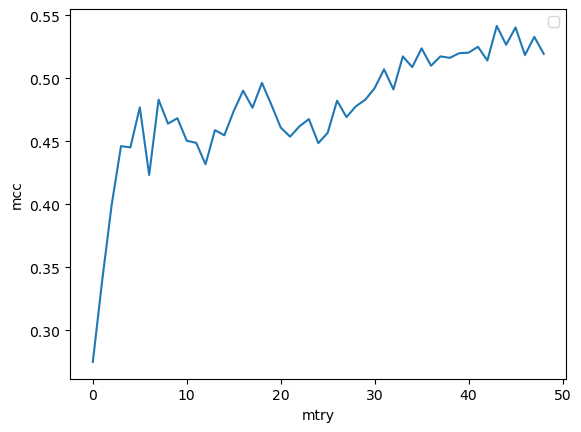

for model 3 validation metrics of:
positives in data 167
negatives in data 185 

fn count = 29
tn count = 155
tp count = 138
fp count = 30 

net accuracy = 0.8323863636363636
positive accuracy = 0.8263473053892215
negative accuracy = 0.8378378378378378 

fpr = 0.16216216216216217
tpr = 0.8263473053892215 

f1 score = 0.8238805970149253
mcc = 0.6640024843850476
cohen Kappa = 0.6639917162826818


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


for fold 4 best mcc of 0.6480819145502931 with an mtry of 47 on test set


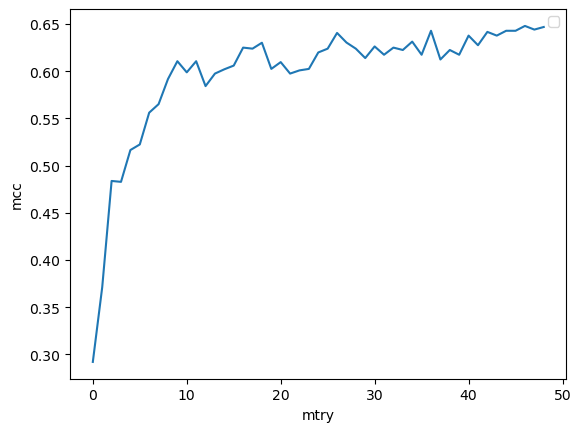

for model 4 validation metrics of:
positives in data 184
negatives in data 168 

fn count = 27
tn count = 126
tp count = 157
fp count = 42 

net accuracy = 0.8039772727272727
positive accuracy = 0.8532608695652174
negative accuracy = 0.75 

fpr = 0.25
tpr = 0.8532608695652174 

f1 score = 0.8198433420365535
mcc = 0.6078500468842873
cohen Kappa = 0.6056118472330475


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


for fold 5 best mcc of 0.6388752043113882 with an mtry of 42 on test set


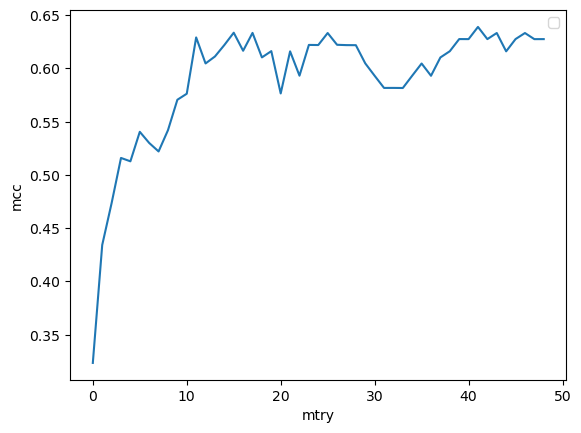

for model 5 validation metrics of:
positives in data 187
negatives in data 163 

fn count = 43
tn count = 126
tp count = 144
fp count = 37 

net accuracy = 0.7714285714285715
positive accuracy = 0.7700534759358288
negative accuracy = 0.7730061349693251 

fpr = 0.22699386503067484
tpr = 0.7700534759358288 

f1 score = 0.782608695652174
mcc = 0.5421000780899908
cohen Kappa = 0.541779857951756


In [5]:
from sklearn.ensemble import RandomForestClassifier
import math
model_list = []
validlist = []
totalmetrics = []
testdat = []
#For loop that uses each fold once for valid/testing and the rest for training
#Each 'split' in the range corresponds to the set used for test/validation with the other 4 for training
iteration = 1
for split in range(0,5):
    #Set creation
    trainlist = [df for i, df in enumerate(folds) if i != split]
    trainset = pd.concat(trainlist, axis=0)
    testset, validset = train_test_split(folds[split], test_size=0.5, random_state=seed)
    
    ytrain = trainset[0].values
    xtrain = trainset.iloc[:, 1:]
    
    ytest = testset[0].values
    xtest = testset.iloc[:, 1:]
    
    yvalid = validset[0].values
    xvalid = validset.iloc[:, 1:]
    
    #lists of metric values
    mcclist = []
    bestmetrics = 0
    maxval = 0
    for mtry in range(1, 50):
        #using mtry as the adjusted hyperparameter creates a series of random forests
        rf = RandomForestClassifier(n_estimators=mtry, criterion='entropy', max_depth=None, 
                                min_samples_split=2, min_samples_leaf=1, 
                                min_weight_fraction_leaf=0.0, max_features='sqrt', 
                                max_leaf_nodes=None, min_impurity_decrease=0.0, 
                                bootstrap=True, oob_score=False, n_jobs= 4, random_state=seed, 
                                verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)

        model= rf.fit(xtrain, ytrain)
        preds = model.predict(xtest)
        #calculate metric (mcc)
        mcc = metriccalc(preds, ytest)[12]
        mcclist.append(mcc)
        if mcc > maxval:
            maxval = mcc
            bestmetrics = mtry
    #store best model for the given fold and plot the metric vs mcc value
    rf = RandomForestClassifier(n_estimators=bestmetrics, criterion='entropy', max_depth=None, 
                                min_samples_split=2, min_samples_leaf=1, 
                                min_weight_fraction_leaf=0.0, max_features='sqrt', 
                                max_leaf_nodes=None, min_impurity_decrease=0.0, 
                                bootstrap=True, oob_score=False, n_jobs= 4, random_state=seed, 
                                verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)
    model_list.append(rf)
    testdat.append(maxval)
    totalmetrics.append(mcclist)
    print('for fold', split + 1, 'best mcc of', maxval, 'with an mtry of', bestmetrics, 'on test set')
    plt.plot(mcclist)

    plt.xlabel('mtry')
    plt.ylabel('mcc')
    plt.legend()
    plt.show()
    
    #check models onto validation set, printing various metrics
    model= rf.fit(xtrain, ytrain)
    preds = model.predict(xvalid)
    results = metriccalc(preds, yvalid)
    validlist.append(results)
    print('for model', iteration, 'validation metrics of:')
    print('positives in data', results[0])
    print('negatives in data', results[1], '\n')
    print('fn count =', results[2])
    print('tn count =', results[3])
    print('tp count =', results[4])
    print('fp count =', results[5], '\n')
    print('net accuracy =', results[6])
    print('positive accuracy =', results[7])
    print('negative accuracy =', results[8], '\n')
    print('fpr =', results[9])
    print('tpr =', results[10], '\n')
    print('f1 score =',results[11])
    print('mcc =',results[12])
    print('cohen Kappa =',results[13])
    iteration = iteration + 1

In [6]:
y = tempset[:, 0]
x = tempset[:, 1:]
iter = 1
validdat = []
for model in model_list:
    predictions = []
    preds = model.predict(x)
    predictions.append(preds)
    
    results = metriccalc(preds, y)
    print('model', iter, 'validation metrics of:')
    print('positives in data', results[0])
    print('negatives in data', results[1], '\n')
    print('fn count =', results[2])
    print('tn count =', results[3])
    print('tp count =', results[4])
    print('fp count =', results[5], '\n')
    print('net accuracy =', results[6])
    print('positive accuracy =', results[7])
    print('negative accuracy =', results[8], '\n')
    print('fpr =', results[9])
    print('tpr =', results[10], '\n')
    print('f1 score =',results[11])
    print('mcc =',results[12])
    print('cohen Kappa =',results[13], '\n')
    iter = iter + 1
    validdat.append(results[12])

model 1 validation metrics of:
positives in data 455
negatives in data 423 

fn count = 81
tn count = 339
tp count = 374
fp count = 84 

net accuracy = 0.8120728929384966
positive accuracy = 0.8219780219780219
negative accuracy = 0.8014184397163121 

fpr = 0.19858156028368795
tpr = 0.8219780219780219 

f1 score = 0.8192771084337349
mcc = 0.6235665794384461
cohen Kappa = 0.6235519730585135 

model 2 validation metrics of:
positives in data 455
negatives in data 423 

fn count = 88
tn count = 349
tp count = 367
fp count = 74 

net accuracy = 0.8154897494305239
positive accuracy = 0.8065934065934066
negative accuracy = 0.8250591016548463 

fpr = 0.17494089834515367
tpr = 0.8065934065934066 

f1 score = 0.8191964285714286
mcc = 0.6312393934177644
cohen Kappa = 0.6309182153625791 

model 3 validation metrics of:
positives in data 455
negatives in data 423 

fn count = 78
tn count = 342
tp count = 377
fp count = 81 

net accuracy = 0.8189066059225513
positive accuracy = 0.8285714285714286
ne

In [7]:
#get x and y values for the final validation set

toxvals = []
fingerprints = []
for row in tempset:
    toxvals.append(row[0])
    fingerprints.append(row[1:])

In [8]:
#calculates consensus of models on each fingerprint in the final validation set
consensuslist = []
predictions = []
for fp in fingerprints:
    consensus = -1
    fp = fp.reshape(1, -1)
    #appends each model's prediction to a list
    predictions = []
    predlist = []
    for model in model_list:
        preds = model.predict(fp)
        predictions.append(preds)
        predlist.append(preds)
    predictions.append(predlist)
    
    #finds number of 0s in the prediction list
    zercount = 0
    for num in predictions:
        if num == 0:
            zercount = zercount + 1
    #as there are 5 models, if there are less than 3 0s predicted, the consensus is 1
    if zercount < 3 :
        consensus = 1
    else:
        consensus = 0
    consensuslist.append(consensus)
#calculate and print metrics
results = metriccalc(consensuslist, toxvals)
print('validation metrics of:')
print('positives in data', results[0])
print('negatives in data', results[1], '\n')
print('fn count =', results[2])
print('tn count =', results[3])
print('tp count =', results[4])
print('fp count =', results[5], '\n')
print('net accuracy =', results[6])
print('positive accuracy =', results[7])
print('negative accuracy =', results[8], '\n')
print('fpr =', results[9])
print('tpr =', results[10], '\n')
print('f1 score =',results[11])
print('mcc =',results[12])
print('cohen Kappa =',results[13])

validation metrics of:
positives in data 455
negatives in data 423 

fn count = 77
tn count = 351
tp count = 378
fp count = 72 

net accuracy = 0.8302961275626424
positive accuracy = 0.8307692307692308
negative accuracy = 0.8297872340425532 

fpr = 0.1702127659574468
tpr = 0.8307692307692308 

f1 score = 0.8353591160220994
mcc = 0.6603249207964403
cohen Kappa = 0.6602820119971955


In [7]:
#with open('/Users/james/Documents/Honours/practhesisprep/figure prep/radarplotdata.txt', 'a') as f:
#    print('Chemopy Mutagen RF Consensus MCC =', results[12] , file=f)

In [8]:
validdat

[0.6281858734692265,
 0.6302912085939482,
 0.6413101271294103,
 0.6418998503442717,
 0.644214575413806]

In [9]:
testdat

[0.6848477076084306,
 0.6807632469071048,
 0.6021289865613914,
 0.6374485356494617,
 0.6613353924179333]